<a href="https://colab.research.google.com/github/Panchol211/Ip_Core_week_9/blob/main/IP_week_9_Core_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**K-NEAREST NEIGHBOR AND NAIVE BAYERS MODELS**##


##Problem Statement##
Implementation of K-nearest neighbor (kNN) classifier and a Naive Bayes classifier to see which model performs better and under which conditions

##Understanding the Business Context##
Working on a titanic dataset and a spambase dataset.

From titanic dataset we want to predict the survival rate of the people who where involved in that Titanic accident

For the spambase dataset, we want to predict who will can the message be classifer as a spam or a genuine message

##efining metrices of success##
I would developed a model that can attain an accuracy of over 80% and challenge my findings to see how best i could have improved my model for a better prediction.

##Expreimental Design##
Titanic Data set and SpamBase dataset be used

Perform exploratory on the data and feature enginering

Build the model and compare their performance

Loading libraries to be used to analysis these datasets

In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

##Reading dataset

In [6]:
data = pd.read_csv("train.csv")


Checking the data

In [7]:
data.shape

(891, 12)

In [8]:
data.size

10692

In [9]:
#previewing the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#previewing the bottom of the dataset
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
#checking the data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The has 5 int variables, 2 float and 5 objects 

#Tidying the Dataset

Data Cleaning

In [12]:
# Identiying the missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

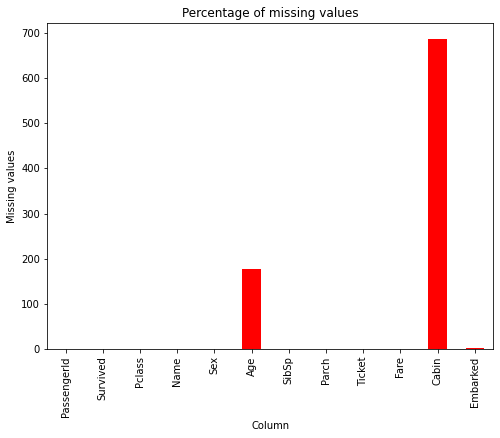

In [13]:
# How are the missing values
data.isna().sum().plot(kind = 'bar',figsize = (8, 6), color = 'red')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

I would like to replace the age missing values with mode value 

In [14]:
# filling age columns with mode  
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

The length of the data set is 891 and cabin has 687 missing values so it will be better to drop the cabin column 

In [15]:
#dropping cabin column 
data["Cabin"] = data.drop('Cabin',axis=1)

In [16]:
# filling Embarked columns with mode  
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [17]:
#checking for missing after cleaning 
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
# Checking for duplicates
data.duplicated().sum()

0

## Outliers in the dataset 

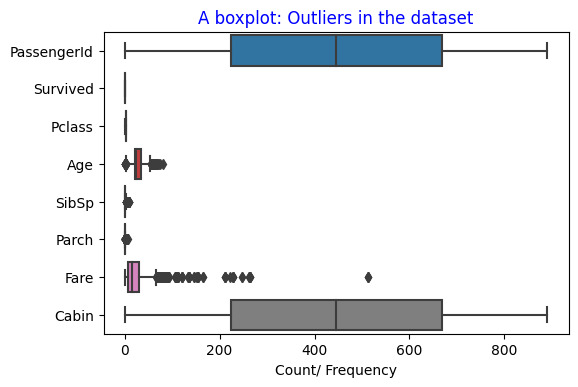

In [19]:
# Checking for ouliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = data , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

The Fare has the highest number of outliers , I will keep the outliers because fare is important in the analysis

##Visualization and Graphing 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


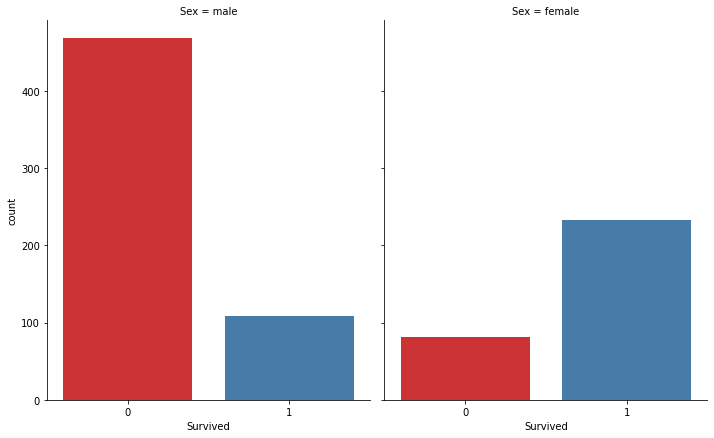

In [20]:
sns.catplot("Survived", col="Sex", col_wrap=4, data=data, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

More men survied than females

#How are different sex distributed 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


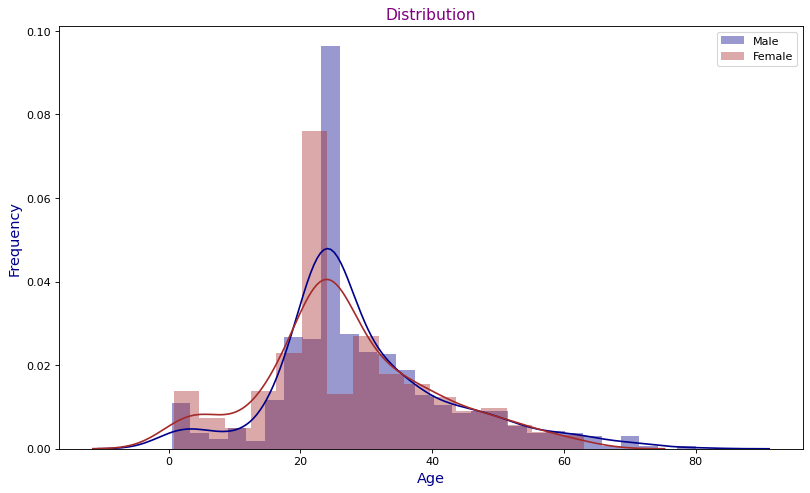

In [21]:
male = data.loc[data.Sex=='male', 'Age']    # Selecting only male datapoints in the age column
female = data.loc[data.Sex=='female', 'Age']  # Selecting only female datapoints in the age column

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkblue", label="Male")
sns.distplot(female, color="brown", label="Female" )
plt.title('Distribution', fontsize = 14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'darkblue')
plt.ylabel('Frequency', fontsize = 13, color = 'darkblue')
plt.legend()
plt.show()

The gender is normally distributed in comparison to the age

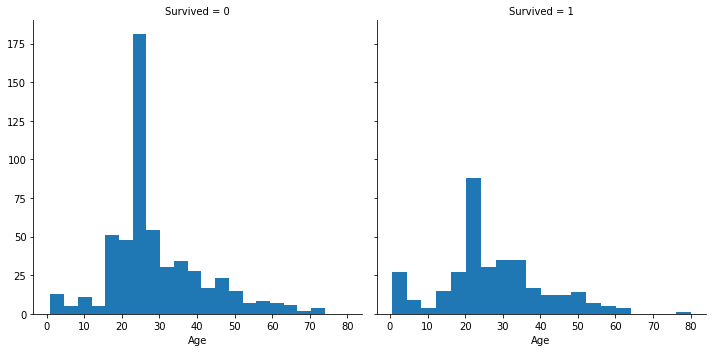

In [24]:
age_distribution = sns.FacetGrid(data, col='Survived', height=5)
age_distribution.map(plt.hist, 'Age', bins=20)
plt.show()

The graph is showing the number of people who survived and who didn't based on age.
The number of people who didn't survived was higher compared to those that survived.

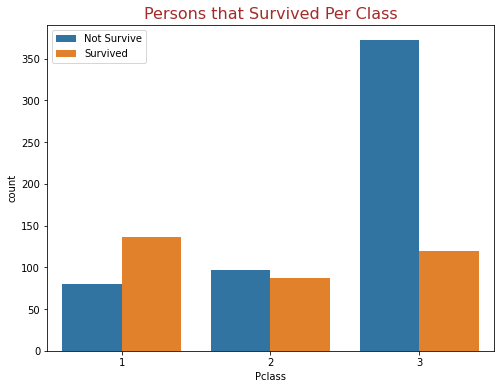

In [25]:
# People who surviced as per the pclass
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', data=data, hue='Survived')
plt.legend(['Not Survive', 'Survived'])
plt.title('Persons that Survived Per Class', fontsize=16, color='brown')
plt.show();

Graph shows how survived and didn't survived vary accross the 3 different classes 

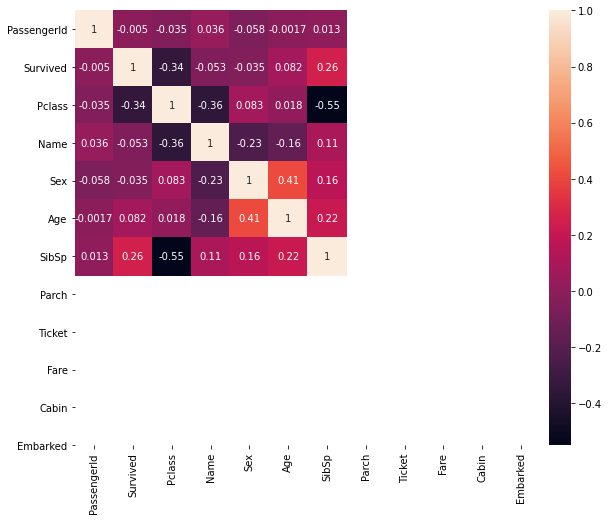

In [27]:
#correlation matrix to show how different variables related 
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
          xticklabels=data.columns.values,
          yticklabels=data.columns.values,
         annot = True)
plt.show()

##Building and Implementing the models

In [28]:
# Loadin the test dataset
test = pd.read_csv("test.csv")

In [37]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
# Splitting the dataset for modelling 

X = data.drop(["Survived","PassengerId","Cabin"],axis=1)
y = np.where(data["Survived"] == True,1,0)

In [39]:
# Finding Dummies
X = pd.get_dummies(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [43]:
y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[110   0]
 [ 69   0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model didnot performed well the accuracy is 61% and it doesn't predict those who didn't survived 

## Parameter Tunning 



In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10]     }
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'n_neighbors': 9}
Accuracy: 0.6201117318435754
Confusion Metrix:
 [[110  68]
 [  0   1]]


The model accuarcy improve by 1 %, the model is 111 out of 179 

##Cross Validation

In [48]:
from sklearn.model_selection import train_test_split
!pip install sklearn

In [49]:
# from sklearn.cross_validation import KFold
# from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [50]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 7


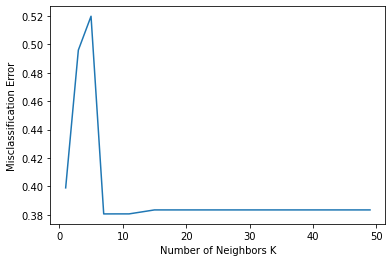

In [51]:
# Determining the best
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

The analysis and observation for the whole ip is on the other notebook